<a href="https://colab.research.google.com/github/sidhu2690/Torch_Notes/blob/main/02_torch_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [115]:
import sklearn
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

In [116]:
n_samples=1000
X, y = make_circles(n_samples, noise=0.05, random_state = 42)

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [118]:
X.shape, y.shape

((1000, 2), (1000,))

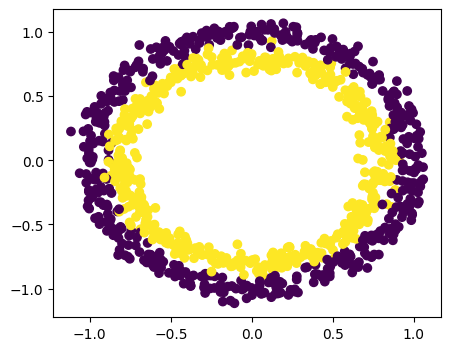

In [119]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 4))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [120]:
import torch
from torch import nn

In [121]:
X_train = torch.tensor(X_train, dtype = torch.float32)
y_train = torch.tensor(y_train)
X_test = torch.tensor(X_test, dtype = torch.float32)
y_test = torch.tensor(y_test)

In [122]:
class classification_model(nn.Module):
  def __init__(self):
    super(classification_model, self).__init__()

    self.model = nn.Sequential(
        nn.Linear(2, 8),
        nn.ReLU(),
        nn.Linear(8, 16),
        nn.Linear(16, 32),
        nn.ReLU(),
        nn.Linear(32, 2)
    )

  def forward(self, X):
    return self.model(X)

In [123]:
model = classification_model()
device = "cuda" if torch.cuda.is_available() else "cpu"

In [124]:
optimizer = torch.optim.Adam(params = model.parameters(), lr = 0.001)
criterion = nn.CrossEntropyLoss()
epochs = 1000

In [125]:
model

classification_model(
  (model): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=16, bias=True)
    (3): Linear(in_features=16, out_features=32, bias=True)
    (4): ReLU()
    (5): Linear(in_features=32, out_features=2, bias=True)
  )
)

In [126]:
model(X_train).shape, y_train.shape

(torch.Size([800, 2]), torch.Size([800]))

In [127]:
for epoch in range(epochs):
  model.train()
  train_correct = 0
  test_correct = 0
  y_pred = model(X_train)
  train_loss = criterion(y_pred,y_train)

  optimizer.zero_grad()
  train_loss.backward()
  optimizer.step()

  train_correct += (torch.argmax(y_pred, dim=1) == y_train).sum().item()
  train_accuracy = train_correct / len(X_train)

  model.eval()
  test_pred = model(X_test)
  test_loss = criterion(test_pred, y_test)
  test_correct += (torch.argmax(test_pred, dim=1) == y_test).sum().item()
  test_accuracy = test_correct / len(X_test)


  if epoch % 100 == 0:
    print(f" Epoch: {epoch} | Train accuracy: {train_accuracy:.3f} | Train loss: {train_loss:.3f} | Test accuracy: {test_accuracy:.3f} |Test loss: {test_loss:.3f}")

 Epoch: 0 | Train accuracy: 0.492 | Train loss: 0.693 | Test accuracy: 0.485 |Test loss: 0.693
 Epoch: 100 | Train accuracy: 0.706 | Train loss: 0.597 | Test accuracy: 0.715 |Test loss: 0.585
 Epoch: 200 | Train accuracy: 0.949 | Train loss: 0.220 | Test accuracy: 0.955 |Test loss: 0.201
 Epoch: 300 | Train accuracy: 0.971 | Train loss: 0.093 | Test accuracy: 0.970 |Test loss: 0.086
 Epoch: 400 | Train accuracy: 0.978 | Train loss: 0.075 | Test accuracy: 0.970 |Test loss: 0.075
 Epoch: 500 | Train accuracy: 0.979 | Train loss: 0.067 | Test accuracy: 0.965 |Test loss: 0.078
 Epoch: 600 | Train accuracy: 0.980 | Train loss: 0.063 | Test accuracy: 0.970 |Test loss: 0.077
 Epoch: 700 | Train accuracy: 0.980 | Train loss: 0.061 | Test accuracy: 0.970 |Test loss: 0.077
 Epoch: 800 | Train accuracy: 0.980 | Train loss: 0.060 | Test accuracy: 0.970 |Test loss: 0.078
 Epoch: 900 | Train accuracy: 0.981 | Train loss: 0.059 | Test accuracy: 0.970 |Test loss: 0.079
